# Continous Probabilistic Methods for Outlier Identification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## INTRODUCTORY EXERCISE

Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [2]:
def get_lower_and_upper_bounds(s, m = 1.5):
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - m * iqr
    upper_fence = q3 + m * iqr
    return lower_fence, upper_fence

In [3]:
df = pd.read_csv('lemonade.csv')
df_copy = df.copy()
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [5]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


## EXERCISE ONE

Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [6]:
temp_low, temp_high = get_lower_and_upper_bounds(df.Temperature)
rain_low, rain_high = get_lower_and_upper_bounds(df.Rainfall)
flyers_low, flyers_high = get_lower_and_upper_bounds(df.Flyers)
price_low, price_high = get_lower_and_upper_bounds(df.Price)
sales_low, sales_high = get_lower_and_upper_bounds(df.Sales)

In [7]:
temp_low_3, temp_high_3 = get_lower_and_upper_bounds(df.Temperature, m = 3)
rain_low_3, rain_high_3 = get_lower_and_upper_bounds(df.Rainfall, m = 3)
flyers_low_3, flyers_high_3 = get_lower_and_upper_bounds(df.Flyers, m = 3)
price_low_3, price_high_3 = get_lower_and_upper_bounds(df.Price, m = 3)
sales_low_3, sales_high_3 = get_lower_and_upper_bounds(df.Sales, m = 3)

### Temperature

In [8]:
df.Temperature.describe()

count    365.000000
mean      61.224658
std       18.085892
min       15.100000
25%       49.700000
50%       61.100000
75%       71.700000
max      212.000000
Name: Temperature, dtype: float64

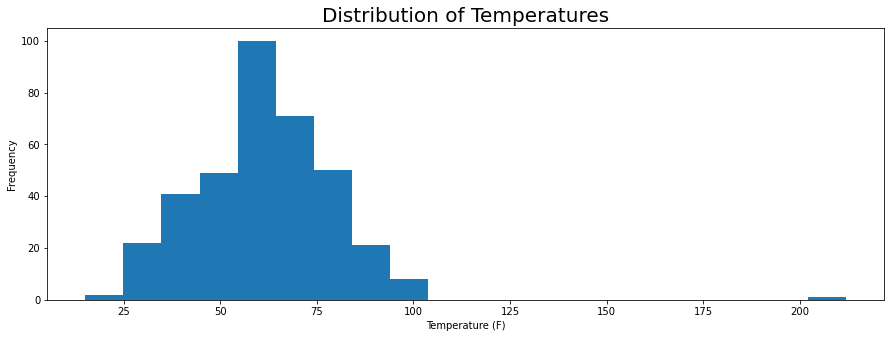

The lower bound for outliers (m = 1.5): 16.700000000000003
The lower bound for outliers (m = 3.0): -16.299999999999997


The higher bound for outliers (m = 1.5): 104.7
The higher bound for outliers (m = 3.0): 137.7


In [9]:
plt.figure(figsize=(15,5))
plt.hist(df.Temperature, bins = 20)
plt.title('Distribution of Temperatures', size = 20)
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.show()

print(f"The lower bound for outliers (m = 1.5): {temp_low}")
print(f"The lower bound for outliers (m = 3.0): {temp_low_3}")
print("\n")
print(f"The higher bound for outliers (m = 1.5): {temp_high}")
print(f"The higher bound for outliers (m = 3.0): {temp_high_3}")

In [10]:
df[(df.Temperature < temp_low) | (df.Temperature > temp_high)] # m = 1.5

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


In [11]:
df[(df.Temperature < temp_low_3) | (df.Temperature > temp_high_3)] # m = 3.0

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


While a temperature of 15.1 degrees Fahrenheit is cold, its still within reason that this would happen during the winter. A temperature of 212.0 is not possible on earth, and likely represents a typo. The temperature for record #41 will be changed to the mean.

In [12]:
df.at[41,'Temperature'] = df.Temperature.mean()

### Rainfall

In [13]:
df.Rainfall.describe()

count    365.000000
mean       0.825973
std        0.273890
min        0.400000
25%        0.650000
50%        0.740000
75%        0.910000
max        2.500000
Name: Rainfall, dtype: float64

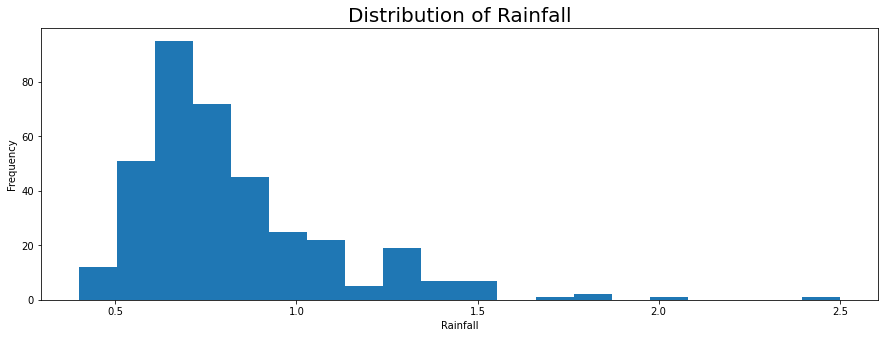

The lower bound for outliers (m = 1.5): 0.26
The lower bound for outliers (m = 3.0): -0.13


The higher bound for outliers (m = 1.5): 1.3
The higher bound for outliers (m = 3.0): 1.69


In [14]:
plt.figure(figsize=(15,5))
plt.hist(df.Rainfall, bins = 20)
plt.title('Distribution of Rainfall', size = 20)
plt.xlabel('Rainfall')
plt.ylabel('Frequency')
plt.show()


print(f"The lower bound for outliers (m = 1.5): {rain_low}")
print(f"The lower bound for outliers (m = 3.0): {rain_low_3}")
print("\n")
print(f"The higher bound for outliers (m = 1.5): {rain_high}")
print(f"The higher bound for outliers (m = 3.0): {rain_high_3}")

In [15]:
df[(df.Rainfall < rain_low) | (df.Rainfall > rain_high)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
12,1/13/17,Friday,37.5,1.33,19,0.5,15
15,1/16/17,Monday,30.6,1.67,24,0.5,12
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14


In [16]:
df[(df.Rainfall < rain_low_3) | (df.Rainfall > rain_high_3)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


There are a decent number of records in the data set that are considered to be outliers. Even the highest rainfalls of 2.50 are reasonable, therefore all outliers will be retained. 

### Flyers

In [17]:
df.Flyers.describe()

count    365.000000
mean      40.104110
std       13.786445
min      -38.000000
25%       31.000000
50%       39.000000
75%       49.000000
max       80.000000
Name: Flyers, dtype: float64

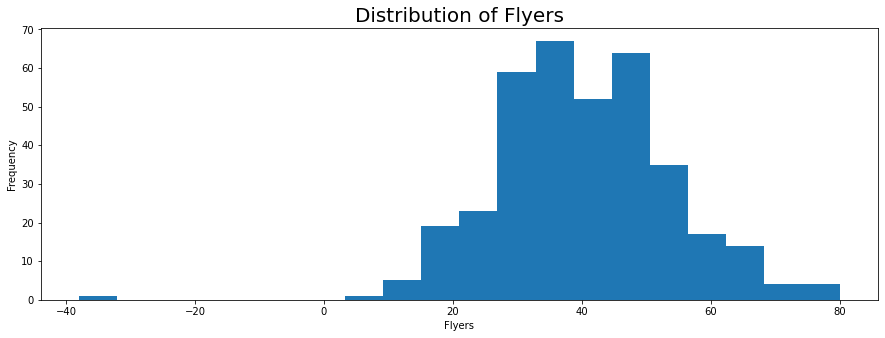

The lower bound for outliers (m = 1.5): 4.0
The lower bound for outliers (m = 3.0): -23.0


The higher bound for outliers (m = 1.5): 76.0
The higher bound for outliers (m = 3.0): 103.0


In [18]:
plt.figure(figsize=(15,5))
plt.hist(df.Flyers, bins = 20)
plt.title('Distribution of Flyers', size = 20)
plt.xlabel('Flyers')
plt.ylabel('Frequency')
plt.show()

print(f"The lower bound for outliers (m = 1.5): {flyers_low}")
print(f"The lower bound for outliers (m = 3.0): {flyers_low_3}")
print("\n")
print(f"The higher bound for outliers (m = 1.5): {flyers_high}")
print(f"The higher bound for outliers (m = 3.0): {flyers_high_3}")

In [19]:
df[(df.Flyers < flyers_low) | (df.Flyers > flyers_high)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
194,7/14/17,Friday,92.0,0.50,80,0.5,40
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


In [20]:
df[(df.Flyers < flyers_low_3) | (df.Flyers > flyers_high_3)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


It is not possible to deliver a negative number of flyers. This is likely an erroneous entry. Given that the mean number of flyers is 40, it is more likely that the record was intended to say 38 instead of -38. Nevertheless, since the record could have also been concievably a number of possibililties, the Flyers data for record #324 will be converted to be equal to the mean. 

In [21]:
df.at[324,'Flyers'] = df.Flyers.mean()

### Price

In [22]:
df.Price.describe()

count    365.0
mean       0.5
std        0.0
min        0.5
25%        0.5
50%        0.5
75%        0.5
max        0.5
Name: Price, dtype: float64

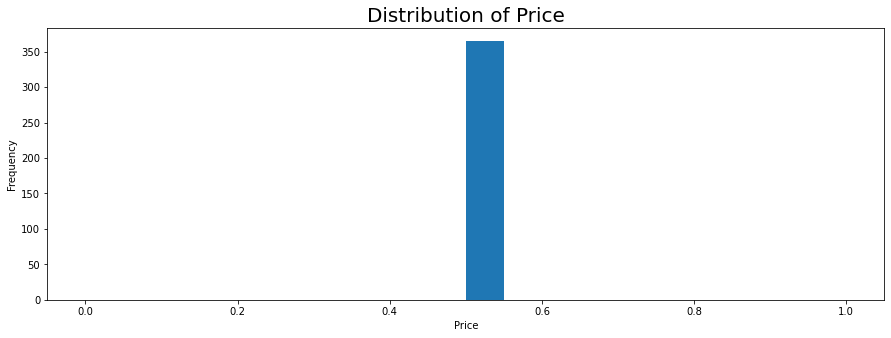

The lower bound for outliers: 0.5
The higher bound for outliers: 0.5


In [23]:
plt.figure(figsize=(15,5))
plt.hist(df.Price, bins = 20)
plt.title('Distribution of Price', size = 20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

print(f"The lower bound for outliers: {price_low}")
print(f"The higher bound for outliers: {price_high}")

In [24]:
df[(df.Price < price_low) | (df.Price > price_high)].size

0

There are no outliers for price. Pricing remained consistent throughout the dataset.

### Sales

In [25]:
df.Sales.describe()

count    365.000000
mean      27.865753
std       30.948132
min        7.000000
25%       20.000000
50%       25.000000
75%       30.000000
max      534.000000
Name: Sales, dtype: float64

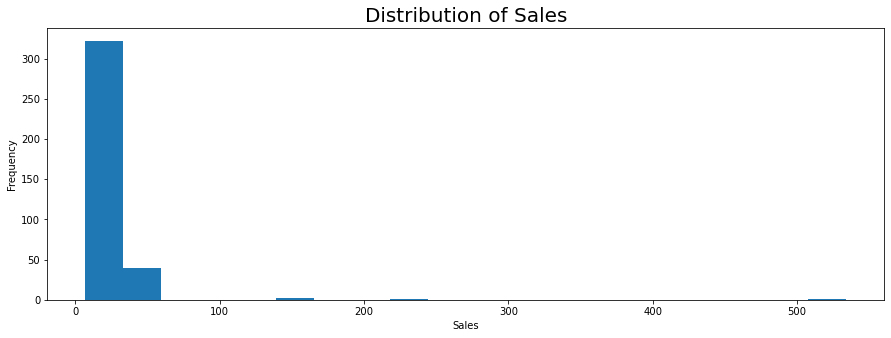

The lower bound for outliers (m = 1.5): 5.0
The lower bound for outliers (m = 3.0): -10.0


The higher bound for outliers (m = 1.5): 45.0
The higher bound for outliers (m = 3.0): 60.0


In [26]:
plt.figure(figsize=(15,5))
plt.hist(df.Sales, bins = 20)
plt.title('Distribution of Sales', size = 20)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

print(f"The lower bound for outliers (m = 1.5): {sales_low}")
print(f"The lower bound for outliers (m = 3.0): {sales_low_3}")
print("\n")
print(f"The higher bound for outliers (m = 1.5): {sales_high}")
print(f"The higher bound for outliers (m = 3.0): {sales_high_3}")

In [27]:
df[(df.Sales < sales_low) | (df.Sales > sales_high)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


In [28]:
df[(df.Sales < sales_low_3) | (df.Sales > sales_high_3)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


Although these days had exceptionally high sales numbers, it is reasonable to consider that the holiday of July 4th may have been dramatically influencing sales volume. These outliers are meaningful and will be retained in the data. 

## EXERCISE TWO/THREE

Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

- Use a 2 sigma decision rule to isolate the outliers.
    - Do these make sense?
    - Should certain outliers be kept or removed?
    
- Use a 3 sigma decision rule to isolate the outliers.
    
### Step One: Which columns are normally distributed?

In [29]:
import scipy.stats as stats
import pylab

We can use visual and statistical tests for normality. 

For the visual test, we will use the **Quantile-Quantile plot**. It plots two sets of quantiles against one another i.e. theoretical quantiles against the actual quantiles of the variable. If our data comes from a normal distribution, we should see all the points sitting on the straight line.

For the statistical test, we will use the **Shapiro-Wilk test**. For this test, the null hypothesis is that the sample is normal. Therefore, if our p-value is greater than our alpha (which in this case will be 0.05), we will fail to reject the null and therefore assert that the distribution is (probably) normal. 

For all continuous variables, we will be testing the following hypotheses:

$H_0$ - The sample is normally distributed (Gaussian)

$H_0$ - The sample is not normally distributed (Gaussian)

#### Temperature (Normally Distributed)

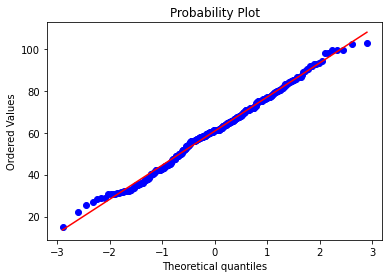

In [30]:
stats.probplot(df.Temperature, dist = 'norm', plot = pylab)
pylab.show()

In [31]:
statistic, p = stats.shapiro(df.Temperature)

print('stat=%.3f, p=%.3f\n' % (statistic, p))
if p < 0.05:
    print ('Reject the null hypothesis. The distribution is probably NOT Gaussian (Normal).')
else:
    print ('Fail to reject the null hypothesis. The distribution is probably Gaussian (Normal)')

stat=0.994, p=0.155

Fail to reject the null hypothesis. The distribution is probably Gaussian (Normal)


The statistical test supports the visual Q-Q plot in asserting that this distribution is a normal distribution. This may be because of our previous handling of the outliers using interquartile range multiples earlier. We can look at the QQ plot and the Shapiro-Wilks test for the raw data as well using the copy of our dataframe we created at the beginning of this analysis.

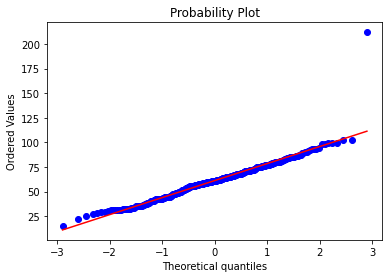

In [32]:
stats.probplot(df_copy.Temperature, dist = 'norm', plot = pylab) # Using the unedited version of our dataframe
pylab.show()

In [33]:
statistic, p = stats.shapiro(df_copy.Temperature)

print('stat=%.3f, p=%.3f\n' % (statistic, p))
if p < 0.05:
    print ('Reject the null hypothesis. The distribution is probably NOT Gaussian (Normal).')
else:
    print ('Fail to reject the null hypothesis. The distribution is probably Gaussian (Normal)')

stat=0.915, p=0.000

Reject the null hypothesis. The distribution is probably NOT Gaussian (Normal).


Without managing the existing outlier, the data passes the Shapiro-Wilks test and is considered NOT normal. The QQ plot clearly identifies the outlier that was previously removed.

#### Rainfall (Not Normal)

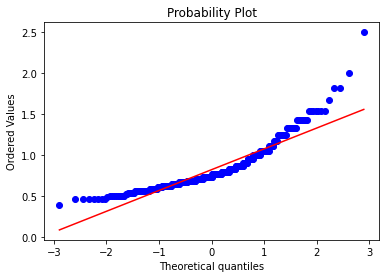

In [34]:
stats.probplot(df.Rainfall, dist = 'norm', plot = pylab)
pylab.show()

In [35]:
statistic, p = stats.shapiro(df.Rainfall)

print('stat=%.3f, p=%.3f\n' % (statistic, p))
if p < 0.05:
    print ('Reject the null hypothesis. The distribution is probably NOT Gaussian (Normal)')
else:
    print ('Fail to reject the null hypothesis. The distribution is probably Gaussian (Normal)')

stat=0.851, p=0.000

Reject the null hypothesis. The distribution is probably NOT Gaussian (Normal)


The histogram of this distribution was skewed positively by large outliers that we retained in the data set. Both the QQ plot and the Shapiro-Wilk test suggest that this data is **NOT** distributed normally. 

#### Flyers (Not Normal)

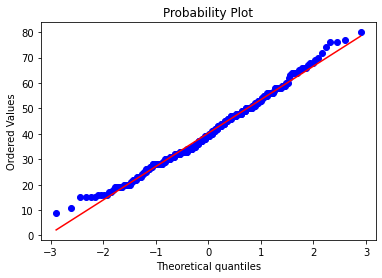

In [36]:
stats.probplot(df.Flyers, dist = 'norm', plot = pylab)
pylab.show()

In [37]:
statistic, p = stats.shapiro(df.Flyers)

print('stat=%.3f, p=%.3f\n' % (statistic, p))
if p < 0.05:
    print ('Reject the null hypothesis. The distribution is probably NOT Gaussian (Normal)')
else:
    print ('Fail to reject the null hypothesis. The distribution is probably Gaussian (Normal)')

stat=0.990, p=0.014

Reject the null hypothesis. The distribution is probably NOT Gaussian (Normal)


Although the QQ Plot appears to be normal, the Shapiro-Wilk test rejected the null hypothesis. It is probable that this data is NOT normally distributed. 

#### Price (Not Normal)

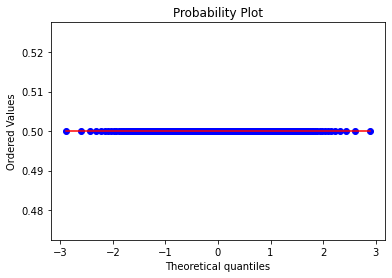

In [38]:
stats.probplot(df.Price, dist = 'norm', plot = pylab)
pylab.show()

In [39]:
statistic, p = stats.shapiro(df.Price)

print('stat=%.3f, p=%.3f\n' % (statistic, p))
if p < 0.05:
    print ('Reject the null hypothesis. The distribution is probably NOT Gaussian (Normal)')
else:
    print ('Fail to reject the null hypothesis. The distribution is probably Gaussian (Normal)')

stat=1.000, p=1.000

Fail to reject the null hypothesis. The distribution is probably Gaussian (Normal)


/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Although both the QQ plot and the Shapiro-Wilk test claim perfect normal distribution within this data, that is largely because the data is not appropriate for either of these tests. The column is made entirely of the same value (0.50). There is no possibility for outliers with this dataset because all values are identical. 

#### Sales (Not Normal)

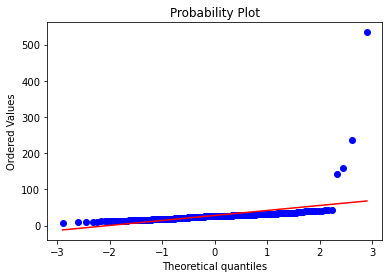

In [40]:
stats.probplot(df.Sales, dist = 'norm', plot = pylab)
pylab.show()

In [41]:
statistic, p = stats.shapiro(df.Sales)

print('stat=%.3f, p=%.3f\n' % (statistic, p))
if p < 0.05:
    print ('Reject the null hypothesis. The distribution is probably NOT Gaussian (Normal)')
else:
    print ('Fail to reject the null hypothesis. The distribution is probably Gaussian (Normal)')

stat=0.207, p=0.000

Reject the null hypothesis. The distribution is probably NOT Gaussian (Normal)


Based on the QQ plot, the sales data is mostly normal with the exception of the extremely high sales volume around the July 4th holiday. The influence of these outliers is so strong, that the Shapiro-Wilks test finds the data to NOT be normally distributed. 

#### Takeaway
So it turns out that none of our columns are normally distributed, and so there is no need to even try to use z-scores as a method for identifying outliers, right? Although technically true based on the requirements of this exercise, its not much of a method if the requirements for the method are so strict that the likelyhood of there being outliers must be low before the method to identify outliers is used, right? 

For this purpose, we will attempt to use Z-score methods to identify outliers in the following columns:
- Temperature: Without the few outliers identified by the IQR multiplier method, this distribution looks approximately normal. 
- Flyers: While the data did not appear to be normal with an alpha = .05, had the alpha been lowered to .01 the Shapiro-Wilks test would have failed to reject the null hypothesis. This is close enough for us to investigate using Z-score methods.
- Sales: Similar to temperature, the removal of high end outliers would likely make the data better approximate a normal distribution. We clearly needed to remove the high temperature outlier as a surface temperature of over 200 degrees Fahrenheit is not possible. By contrast, the exceptionally high volumes found in the sales outliers are possible and should probably not be removed. Nevertheless, since the data would be more likely to fail the Shapiro-Wilks test if those outliers were to be removed, we will attempt to identify outliers with the z-score method. Our decision on what to do with these outliers will not change, as even the most extreme outlier value in the dataset was deemed worthy for continued inclusion already. 

We will not attempt to use Z-score methods to identify outliers for the following columns:
- Rainfall: There is a clear and substantial positive skew present. The IQR multiplier method identified a large number of outliers, and the removal of a substantial portion of the dataset would be required before the remaining values even began to approximate normality. 
- Price: All of the values are identical. There is no need to even consider outliers as they cannot exist. 

### Step Two: Determining Outliers Using Z-Scores

#### Temperature

In [42]:
# Calculate the z-score 
zscore_temp = pd.Series((df_copy.Temperature - df_copy.Temperature.mean()) / df_copy.Temperature.std())

df_copy['zscore_temp'] = zscore_temp

df_copy.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,zscore_temp
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.892340
1,1/2/17,Monday,28.9,1.33,15,0.5,13,-1.787286
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,-1.477652
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,-0.946852
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,-1.040848


In [43]:
# Finds all of the observations two standard deviations or more.
df_copy[df_copy.zscore_temp.abs() >= 2]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,zscore_temp
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,8.336627
166,6/16/17,Friday,99.3,0.47,77,0.5,41,2.105251
176,6/26/17,Monday,102.6,0.47,60,0.5,42,2.287714
181,7/1/17,Saturday,102.9,0.47,59,0.5,143,2.304301
190,7/10/17,Monday,98.0,0.49,66,0.5,40,2.033372
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41,2.105251
202,7/22/17,Saturday,99.6,0.47,49,0.5,42,2.121838
207,7/27/17,Thursday,97.9,0.47,74,0.5,43,2.027843
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10,-2.168799
364,12/31/17,Sunday,15.1,2.50,9,0.5,7,-2.550311


In [44]:
# Finds all of the observations three standard deviations or more
df_copy[df_copy.zscore_temp.abs() >= 3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,zscore_temp
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,8.336627


Utilizing the higher z-score better isolated the most egregious outliers.

#### Flyers

In [45]:
# Calculate the z-score 
zscore_flyer = pd.Series((df_copy.Flyers - df_copy.Flyers.mean()) / df_copy.Flyers.std())

df_copy['zscore_flyer'] = zscore_flyer

df_copy.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,zscore_temp,zscore_flyer
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.892340,-1.820927
1,1/2/17,Monday,28.9,1.33,15,0.5,13,-1.787286,-1.820927
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,-1.477652,-0.950507
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,-0.946852,-0.877972
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,-1.040848,-0.515297


In [46]:
# Finds all of the observations two standard deviations or more.
df_copy[df_copy.zscore_flyer.abs() >= 2]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,zscore_temp,zscore_flyer
166,6/16/17,Friday,99.3,0.47,77,0.5,41,2.105251,2.676244
170,6/20/17,Tuesday,85.1,0.54,70,0.5,37,1.320109,2.168499
171,6/21/17,Wednesday,94.3,0.47,76,0.5,41,1.828792,2.603709
182,7/2/17,Sunday,93.4,0.51,68,0.5,158,1.779030,2.023429
183,7/3/17,Monday,81.5,0.54,68,0.5,235,1.121058,2.023429
194,7/14/17,Friday,92.0,0.50,80,0.5,40,1.701621,2.893849
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41,2.105251,2.603709
203,7/23/17,Sunday,89.1,0.51,72,0.5,37,1.541275,2.313569
204,7/24/17,Monday,83.5,0.57,69,0.5,35,1.231642,2.095964
207,7/27/17,Thursday,97.9,0.47,74,0.5,43,2.027843,2.458639


In [47]:
# Finds all of the observations three standard deviations or more
df_copy[df_copy.zscore_flyer.abs() >= 3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,zscore_temp,zscore_flyer
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20,-0.786506,-5.665283


Utilizing the higher z-score better isolated the most egregious outliers.

#### Sales

In [48]:
# Calculate the z-score 
zscore_sales = pd.Series((df_copy.Sales - df_copy.Sales.mean()) / df_copy.Sales.std())

df_copy['zscore_sales'] = zscore_sales

df_copy.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,zscore_temp,zscore_flyer,zscore_sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.892340,-1.820927,-0.577281
1,1/2/17,Monday,28.9,1.33,15,0.5,13,-1.787286,-1.820927,-0.480344
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,-1.477652,-0.950507,-0.415720
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,-0.946852,-0.877972,-0.351096
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,-1.040848,-0.515297,-0.318783


In [49]:
# Finds all of the observations two standard deviations or more.
df_copy[df_copy.zscore_sales.abs() >= 2]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,zscore_temp,zscore_flyer,zscore_sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143,2.304301,1.370614,3.720233
182,7/2/17,Sunday,93.4,0.51,68,0.5,158,1.779030,2.023429,4.204914
183,7/3/17,Monday,81.5,0.54,68,0.5,235,1.121058,2.023429,6.692948
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534,1.270346,0.645264,16.354275


In [50]:
# Finds all of the observations three standard deviations or more
df_copy[df_copy.zscore_sales.abs() >= 3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,zscore_temp,zscore_flyer,zscore_sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143,2.304301,1.370614,3.720233
182,7/2/17,Sunday,93.4,0.51,68,0.5,158,1.779030,2.023429,4.204914
183,7/3/17,Monday,81.5,0.54,68,0.5,235,1.121058,2.023429,6.692948
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534,1.270346,0.645264,16.354275


Both of these matched the results of using the IQR multiplier method.